## Cohort Analysis with Python

### What is Cohort Analysis?

Cohort analysis is a statistical technique used to analyze groups of individuals with a shared characteristic over a defined period. In business contexts, a cohort is a group of customers who share a common characteristic or behavior, such as their first purchase date, acquisition channel, or demographic profile. Companies can track key metrics, such as retention rate, average order value, or lifetime value, for each cohort over subsequent time periods such as months or quarters.

In this excercise, our focus will be on analyzing customer retention rates.

### About the dataset

The dataset utilized for this analysis is sourced from the Online Retail dataset obtained from the UCI Machine Learning Repository. It contains transactional records spanning from 01/12/2009 to 09/12/2011 and originates from a UK-based and registered online retail business. The company primarily focuses on selling all-occasion gifts, the company primarily serves wholesale customers.

### Data Cleaning

For this cohort analysis, we will using the following libaries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

Next we will loading data from excel file and examining data set

In [ ]:
file_path = r"C:\Users\KateTran\Documents\Kate\Cohort Analysis\Online Retail_UCI.xlsx"
data_type = {'InvoiceID': str, 'CustomerID': str }
df = pd.read_excel(file_path, dtype= data_type)
df.head()

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


Checking if the dataset contains any missing value.

In [ ]:
df.isnull().sum()

InvoiceID           0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
CustomerID     235287
Country             0
dtype: int64

The dataset includes missing values in the Customer ID and Description fields. To conduct cohort analysis, we will remove the rows with empty Customer ID entries. However, since empty description fields do not impact our analysis, we will retain them as is.

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809561 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceID    809561 non-null  object        
 1   StockCode    809561 non-null  object        
 2   Description  809561 non-null  object        
 3   Quantity     809561 non-null  int64         
 4   InvoiceDate  809561 non-null  datetime64[ns]
 5   Price        809561 non-null  float64       
 6   CustomerID   809561 non-null  object        
 7   Country      809561 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 55.6+ MB


Let's examine the distribution of quantity and unit price fields.

In [ ]:
df.describe()

,Quantity,InvoiceDate,Price
count,809561.000000,809561,809561.000000
mean,12.460672,2011-01-02 10:27:55.274328320,3.685980
min,-80995.000000,2009-12-01 07:45:00,0.000000
25%,2.000000,2010-07-02 08:26:00,1.250000
50%,5.000000,2010-12-02 09:37:00,1.950000
75%,12.000000,2011-08-01 10:08:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,190.301161,NaN,70.876558


We've noticed negative quantities in the dataset, which are likely indicative of return transactions. To ensure the accuracy of our analysis, we'll exclude these return transactions from the dataset.

In [ ]:
df = df[df['Quantity'] > 0]

### Cohort Analysis

It is observed that the dataset does not contain information regarding the customers' initial joining dates. For the purpose of this cohort analysis, we'll consider the cohort classification based on the customers' first purchase date instead. Thus, in December 2009 which is the initial data point in this dataset, we anticipate a significant influx of new customers.

Next, we'll introduce two new variables: 'Cohort' and 'Order_month'. According to our earlier assumption, we will assign the minimum value of 'Order_month' per customer to the 'Cohort' value.

In [ ]:
df['Cohort'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df['Order_month'] = df['InvoiceDate'].dt.to_period('M')
df.loc[df['Cohort'] != df['Order_month']].head(10)

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Cohort,Order_month
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,2009-12,2010-01
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,2009-12,2010-01
45234,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590,United Kingdom,2009-12,2010-01
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590,United Kingdom,2009-12,2010-01
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590,United Kingdom,2009-12,2010-01
45237,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590,United Kingdom,2009-12,2010-01
45238,493414,21527,RETRO SPOT TRADITIONAL TEAPOT,12,2010-01-04 10:28:00,6.95,14590,United Kingdom,2009-12,2010-01
45239,493414,21531,RETRO SPOT SUGAR JAM BOWL,24,2010-01-04 10:28:00,2.10,14590,United Kingdom,2009-12,2010-01
45260,493428,84563A,PINK & WHITE BREAKFAST TRAY,1,2010-01-04 11:15:00,5.95,16550,United Kingdom,2009-12,2010-01
45261,493428,84562A,PINK/WHITE RIBBED MELAMINE JUG,1,2010-01-04 11:15:00,7.95,16550,United Kingdom,2009-12,2010-01


In [ ]:
#Lifetime month is the time difference between 'Order_month' and the first join month
def diff_month(x):
    d1 = x['Order_month']
    d2 = x['Cohort']
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)

df['Lifetime_month'] = df.apply(lambda x: diff_month(x), axis=1)
df[df['Cohort'] != df['Order_month']].head()

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Cohort,Order_month,Lifetime_month
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346,United Kingdom,2009-12,2010-01,1
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346,United Kingdom,2009-12,2010-01,1
45234,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590,United Kingdom,2009-12,2010-01,1
45235,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590,United Kingdom,2009-12,2010-01,1
45236,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590,United Kingdom,2009-12,2010-01,1


In [ ]:
df_cohort = df.groupby(['Cohort', 'Order_month', 'Lifetime_month']) \
              .agg(Customer_count=('CustomerID', 'nunique')) \
              .reset_index(drop=False)
df_cohort.head()

,Cohort,Order_month,Lifetime_month,Customer_count
0,2009-12,2009-12,0,955
1,2009-12,2010-01,1,337
2,2009-12,2010-02,2,319
3,2009-12,2010-03,3,406
4,2009-12,2010-04,4,363


Next, we will need to transform data into a matrix.

In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'Cohort', columns = 'Lifetime_month', values = 'Customer_count')
print(cohort_pivot)

Lifetime_month     0      1      2      3      4      5      6      7      8   \
Cohort                                                                          
2009-12         955.0  337.0  319.0  406.0  363.0  343.0  360.0  327.0  321.0   
2010-01         383.0   79.0  119.0  117.0  101.0  115.0   99.0   88.0  107.0   
2010-02         376.0   89.0   84.0  109.0   92.0   75.0   72.0  107.0   95.0   
2010-03         443.0   84.0  102.0  107.0  103.0   90.0  109.0  134.0  122.0   
2010-04         294.0   57.0   57.0   48.0   54.0   66.0   81.0   77.0   31.0   
2010-05         254.0   40.0   43.0   44.0   45.0   65.0   54.0   32.0   15.0   
2010-06         270.0   47.0   51.0   55.0   62.0   77.0   34.0   24.0   22.0   
2010-07         186.0   29.0   34.0   55.0   54.0   26.0   21.0   27.0   27.0   
2010-08         162.0   33.0   48.0   52.0   28.0   19.0   16.0   20.0   22.0   
2010-09         243.0   55.0   57.0   30.0   22.0   25.0   33.0   24.0   31.0   
2010-10         377.0   97.0

To calculation customer retention rate, we divide the number of customer during their lifetime by the cohort size.

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix.to_excel('test.xlsx', index=False)

Let's visualize the rentention rate matrix on heatmap

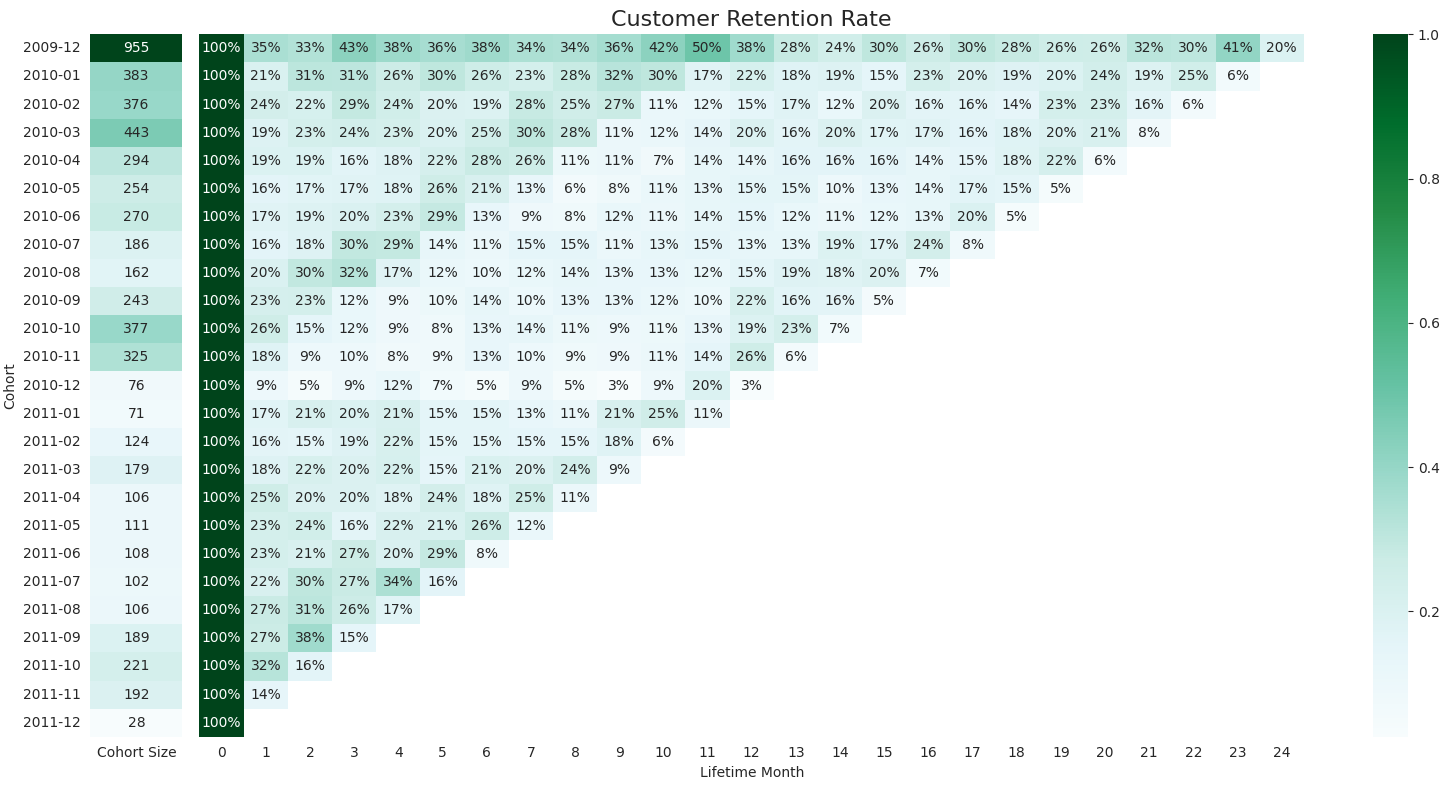

In [ ]:
# plot the retention matrix
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8), sharey=True, gridspec_kw={'width_ratios': [1, 15]})
    
    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Cohort Size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap='BuGn', 
                ax=ax[0])
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='BuGn', 
                ax=ax[1])
    
    ax[1].set_title('Customer Retention Rate', fontsize=16)
    ax[1].set(xlabel='Lifetime Month', ylabel='')

    fig.tight_layout()

Key insights: <br> - The 1st cohort (2009-12) is expected to have the highest cohort size since it represents the initial data point, implying that all 995 customers are assumed to make their first purchase during that month. <br> - There is a general trend of declining retention rates over time across most cohorts. However, certain cohorts exhibit fluctuations in retention rates, indicating many potential factors such as business nature and customer behaviour influencing retention. With a deep understanding about the business model, we can gain more insights into this fluctation. <br> -The first cohort surprisingly performs much better than the others. 50% of customer returns after the 1st year and 41% retention after the second year. <br> - While not explicitly evident from the above heatmap, seasonal effects seems to impact retention rates. The higher retention rates observed during October and November coincide with holiday seasons and promotional campaigns.